<a href="https://colab.research.google.com/github/Tirtayuda12/Machine_Learning-Telu/blob/main/Week%202/Google%20Colab/Linear_Regression_on_salary_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Tirtayuda Munggarana

NIM : 1103202108

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/DatasetML/Salary_Data.csv')

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np


In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


Prompt : ingin membuat model linear regression dengan dataset Salary_Data.csv bagaimana tahapannya?

Untuk membuat model regresi linear menggunakan dataset Salary_Data.csv, Anda dapat mengikuti langkah-langkah berikut:

Persiapkan Dataset: Pastikan Anda memiliki file Salary_Data.csv dan pustaka Python yang diperlukan seperti Pandas, NumPy, dan scikit-learn untuk melakukan analisis dan pembuatan model.

Impor Library: Impor pustaka yang diperlukan seperti Pandas untuk membaca dataset, NumPy untuk manipulasi data numerik, dan scikit-learn untuk membangun model regresi linear.

Baca Dataset: Gunakan Pandas untuk membaca dataset dari file CSV ke dalam DataFrame.

Pemisahan Data: Pisahkan data menjadi fitur (X) dan target (y). Fitur dalam kasus ini adalah pengalaman kerja, dan target adalah gaji.

Pemisahan Data Latih dan Uji: Pisahkan dataset menjadi data latih dan data uji. Data latih digunakan untuk melatih model, sedangkan data uji digunakan untuk menguji kinerja model.

Inisialisasi Model: Inisialisasikan model regresi linear menggunakan scikit-learn.

Latih Model: Latih model menggunakan data latih yang telah dipersiapkan.

Evaluasi Model: Evaluasi model menggunakan data uji. Anda dapat menggunakan metrik evaluasi seperti Mean Squared Error (MSE) atau R-squared untuk mengevaluasi kinerja model.

Prediksi: Setelah model dilatih, gunakan model untuk membuat prediksi pada data baru.

In [7]:
#Pemisahan data
X = data.iloc[:, :-1].values  # Fitur (pengalaman kerja)
y = data.iloc[:, 1].values    # Target (gaji)

In [9]:
# Pisahkan data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [10]:
# Evaluasi model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 49830096.85590839
R-squared: 0.9024461774180497


In [13]:

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# MAE (Mean Absolute Error)
mae = np.mean(np.abs(y_test - y_pred))
print("Mean Absolute Error (MAE):", mae)

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

Root Mean Squared Error (RMSE): 7059.04362190151
Mean Absolute Error (MAE): 6286.453830757749
Mean Absolute Percentage Error (MAPE): 7.744880046205216


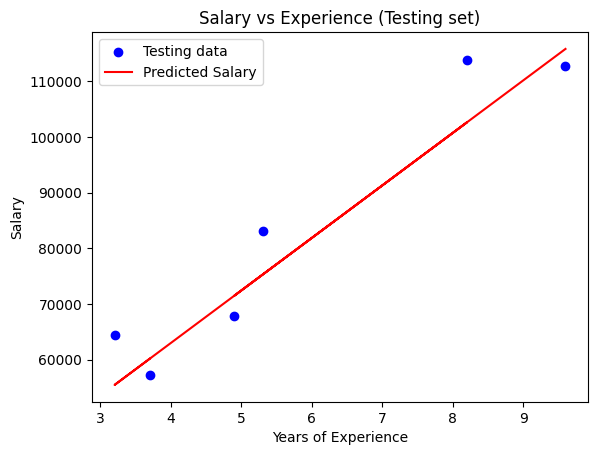

In [14]:
# Visualisasi data uji dan prediksi
plt.scatter(X_test, y_test, color='blue', label='Testing data')
plt.plot(X_test, y_pred, color='red', label='Predicted Salary')
plt.title('Salary vs Experience (Testing set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

Prompt : Bagaimana cara memvisualisasikan data train, data test dengan garis regresi dari modelnya?

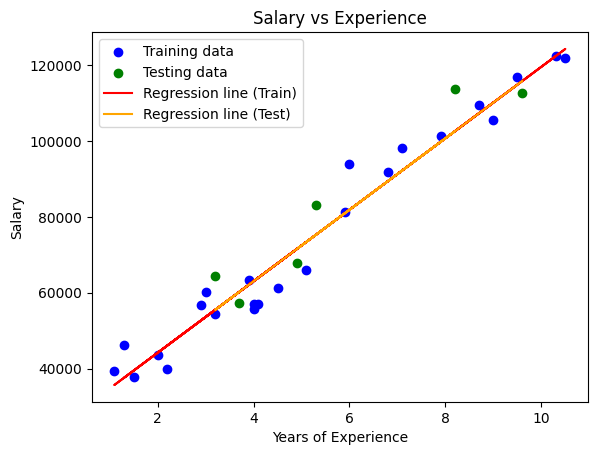

In [17]:
# Visualisasi data latih
plt.scatter(X_train, y_train, color='blue', label='Training data')
# Visualisasi data uji
plt.scatter(X_test, y_test, color='green', label='Testing data')

# Plot garis regresi untuk data latih
plt.plot(X_train, model.predict(X_train), color='red', label='Regression line (Train)')

# Plot garis regresi untuk data uji
plt.plot(X_test, model.predict(X_test), color='orange', label='Regression line (Test)')

plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [20]:
import pandas as pd

#Buat dataframe untuk data test
df_test = pd.DataFrame(X_test, columns=["YearExperience"])

#Tambahkan kolom 'Actual' untuk nilai aktual
df_test['Actual']=y_test

#Tambahkan kolom 'Predicted' untuk nilai prediksi
df_test['Predicted'] =y_pred

df_test

,YearExperience,Actual,Predicted
0,9.6,112635.0,115790.210113
1,4.9,67938.0,71498.278095
2,8.2,113812.0,102596.868661
3,5.3,83088.0,75267.804224
4,3.2,64445.0,55477.792045
5,3.7,57189.0,60189.699707


Prompt : Bagaimana cara menginputkan data baru dan meminta supaya model memberikan prediksi dari data yang kita masukan

In [21]:
new_data = np.array([[10]]) #contoh: satu data menggunakan pengalaman 10 tahun

predicted_salary = model.predict(new_data)

print("Predicted Salary", predicted_salary)

Predicted Salary [119559.73624209]
